读取一幅灰度图像，实现图像灰度的指数变换，在屏幕上显示变换前、后图像，以及变换前后图像的
灰度直方图。

In [6]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
root_path = '/root/DIVP_project/'
einstein_path = "project02/proj02-images/einstein_orig.tif"

In [8]:
# 读取一张灰度图片
image_einstein = Image.open(root_path + einstein_path)
print(type(image_einstein))
print(image_einstein.size)
print(image_einstein.mode)

<class 'PIL.TiffImagePlugin.TiffImageFile'>
(490, 600)
L


In [9]:
# 对图像image_einstein进行指数变换
def exponential_transformation(image:Image, c: float, gamma: float) -> Image:
    # 获取图像的宽和高
    width, height = image.size
    # 创建一个新的图像
    new_image = Image.new("L", (width, height))
    # 获取图像的像素
    pixels = image.load()
    new_pixels = new_image.load()
    # 对图像进行指数变换
    for i in range(width):
        for j in range(height):
            new_pixels[i, j] = (int)(c * (pixels[i, j] ** gamma))
    return new_image

In [16]:
# 对图像image_einstein进行对数变换
image_einstein_ex = exponential_transformation(image_einstein, 1, 0.8)

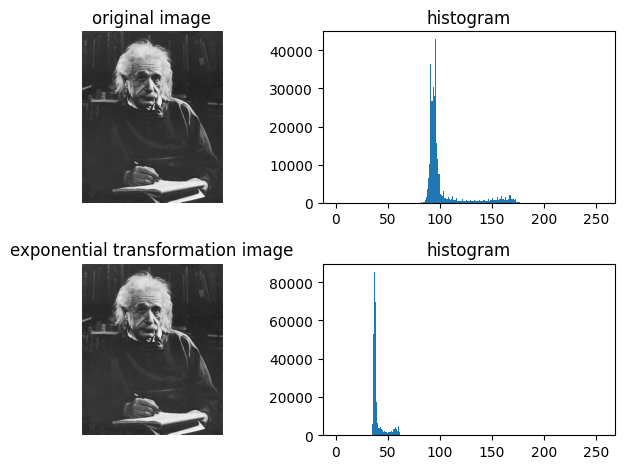

In [17]:
# 可视化图像，并统计图像直方图,使用plt.suplots()函数
plt.figure()
plt.subplot(221)
plt.title("original image")
plt.imshow(image_einstein, cmap="gray")
plt.axis("off")
plt.subplot(222)
plt.title("histogram")
plt.hist(np.array(image_einstein).flatten(), bins=256, range=[0, 256])
plt.subplot(223)
plt.title("exponential transformation image")
plt.imshow(image_einstein_ex, cmap="gray")
plt.axis("off")
plt.subplot(224)
plt.title("histogram")
plt.hist(np.array(image_einstein_ex).flatten(), bins=256, range=[0, 256])
plt.tight_layout()
plt.show()